This notebook is to test out the mathematical model that will be used to create the realsitic synthetic data.

I am trying to adjust the model so it better reflects real data such as the thickess ice and snow is around Greenland.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [63]:
def mask_image(observations, data):
    mask_data = np.copy(data)
    for i in range(len(observations)):
        for j in range(len(observations[0])):
            if np.isnan(observations[i][j]):
                mask_data[i][j] = np.nan
    return mask_data

In [3]:
## for reference this is the synthetic model that I have been using previously
def synthetic_gaussian_snow(nx, ny):
    snow_blob1 = 0.5 * np.exp(-(np.power(nx - 0.2, 2) + np.power(ny - 0.2, 2)) / 0.1)
    snow_blob2 = 0.3 * np.exp(-(np.power(nx + 0.3, 2) + np.power(ny + 0.3, 2)) / 0.15)
    return snow_blob2 + snow_blob1

def synthetic_gaussian_ice(nx, ny):
    ice_center = 6 * np.exp(-(np.power(nx, 2) + np.power(ny, 2)) / 0.4)
    ice_dispersed = 0.8 * np.exp(-((np.power(nx - 0.5, 2) + np.power(ny - 0.5, 2)) / 0.3))
    return ice_center + ice_dispersed

In [26]:
# using real dataset for the Arctic
data_reference = np.loadtxt("synthetic/dailyFB_50km_2019-2020_season.pkl_ice_masked")

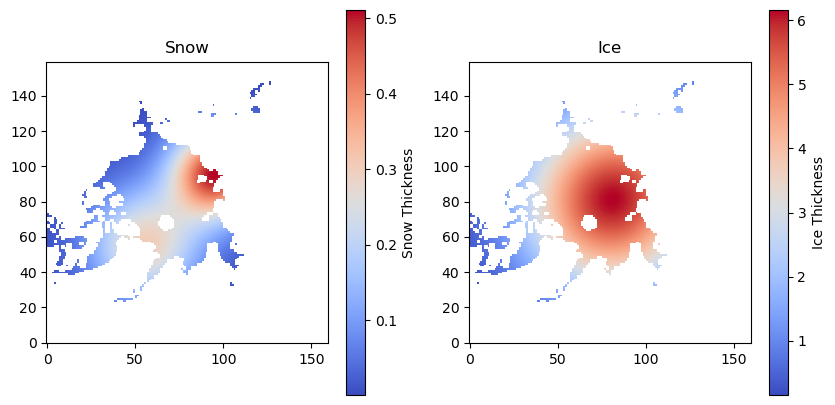

In [35]:
# Generate meshgrid for plotting
x = np.linspace(-1, 1, 160)
y = np.linspace(-1, 1, 160)
X, Y = np.meshgrid(x, y)

# Compute synthetic models
snow_thickness = synthetic_gaussian_snow(X, Y)
ice_thickness = synthetic_gaussian_ice(X, Y)

masked_snow = mask_image(data_reference,snow_thickness)
masked_ice = mask_image(data_reference,ice_thickness)

# Plot snow thickness
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(masked_snow, cmap='coolwarm', origin='lower')
plt.colorbar(label='Snow Thickness')
plt.title('Snow')

# Plot ice thickness
plt.subplot(1, 2, 2)
plt.imshow(masked_ice, cmap='coolwarm', origin='lower')
plt.colorbar(label='Ice Thickness')
plt.title('Ice')

plt.show()

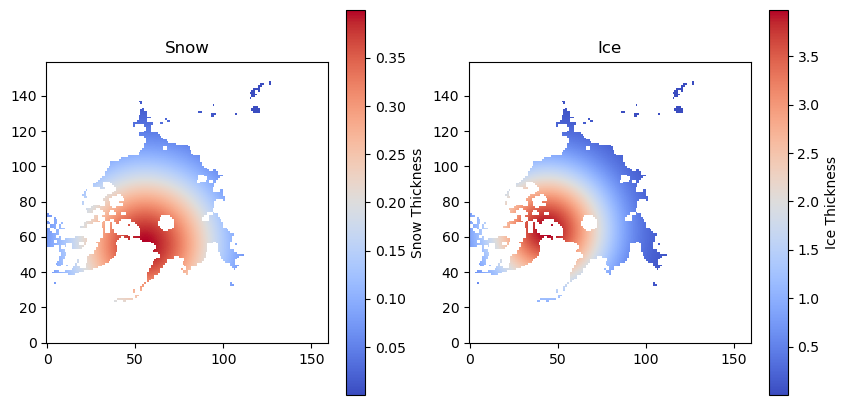

In [86]:
# testing it here
def synthetic_gaussian_snow(nx, ny):
    # snow_blob1 = 0.1 * np.exp(-(np.power(nx + 0.1 , 2) + np.power(ny + 0.3, 2)) / 0.1)
    snow_blob2 = 0.4 * np.exp(-(np.power(nx + 0.3, 2) + np.power(ny + 0.3, 2)) / 0.3)
    return snow_blob2 #+ snow_blob1

def synthetic_gaussian_ice(nx, ny):
    ice_center = 4 * np.exp(-(np.power(nx + 0.45, 2) + np.power(ny + 0.2, 2)) / 0.2)
    # ice_dispersed = 0.8 * np.exp(-((np.power(nx - 0.5, 2) + np.power(ny - 0.5, 2)) / 0.3))
    return ice_center #+ ice_dispersed

# Generate meshgrid for plotting
x = np.linspace(-1, 1, 160)
y = np.linspace(-1, 1, 160)
X, Y = np.meshgrid(x, y)

# Compute synthetic models
snow_thickness = synthetic_gaussian_snow(X, Y)
ice_thickness = synthetic_gaussian_ice(X, Y)

masked_snow = mask_image(data_reference,snow_thickness)
masked_ice = mask_image(data_reference,ice_thickness)

# Plot snow thickness
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(masked_snow, cmap='coolwarm', origin='lower')
plt.colorbar(label='Snow Thickness')
plt.title('Snow')

# Plot ice thickness
plt.subplot(1, 2, 2)
plt.imshow(masked_ice, cmap='coolwarm', origin='lower')
plt.colorbar(label='Ice Thickness')
plt.title('Ice')

plt.show()